# This code takes in a .json file from TweetyBERT, then calculates and graphs the song duration across days of recording. Then, It figures out and graphs how often syllables show up across each day of recording.

In [1]:
recording_file_path_name = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/USA5509_decoded_database.json'
save_output_to_this_file_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/outputs'
path_to_json_file_with_dates = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/USA5509_creation_data.json'


### Load the .json file here, correct the dates, etc.

In [2]:
import json
import pandas as pd
import ast
from datetime import datetime

class temp:
    def __init__(self):
        # Define the path to the JSON file
        #recording_file_path_name = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/USA5509_decoded_database.json'
        #recording_file_path_name = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/USA5336_decoded_database.json'

        # Read the JSON file
        print(f"Reading JSON file: {recording_file_path_name}")
        with open(recording_file_path_name, 'r') as f:
            decoder_data = json.load(f)['results']  # Adjusted to extract the 'results' key

        # Print the total number of songs (assuming each item in 'results' is a song)
        print(f"Total songs in JSON: {len(decoder_data)}")

        # Convert to DataFrame
        decoder_dataframe = pd.DataFrame(decoder_data)
        decoder_dataframe['syllable_onsets_offsets_ms'] = decoder_dataframe['syllable_onsets_offsets_ms'].apply(self.parse_json_safe)
        decoder_dataframe['syllable_onsets_offsets_timebins'] = decoder_dataframe['syllable_onsets_offsets_timebins'].apply(self.parse_json_safe)

        self.dataframe = decoder_dataframe

    def return_dataframe(self):
        return self.dataframe


    def parse_json_safe(self, s):
            """
            Safely parse a string representation of a JSON object.
            Handles extra quotes and converts single quotes to double quotes.
            """
            if isinstance(s, dict):
                return s  # If it's already a dictionary, return it as is
            
            if pd.isna(s):
                return {}
            
            # Remove surrounding single quotes
            s = s.strip()
            if s.startswith("''") and s.endswith("''"):
                s = s[2:-2]
            elif s.startswith("'") and s.endswith("'"):
                s = s[1:-1]
            
            if not s:
                return {}
            
            try:
                # First, attempt to parse using json
                s_json = s.replace("'", '"')
                return json.loads(s_json)
            except json.JSONDecodeError:
                try:
                    # If json fails, attempt using ast.literal_eval
                    return ast.literal_eval(s)
                except (ValueError, SyntaxError) as e:
                    print(f"Error parsing string: {s}\nError: {e}")
                    return {}
    
TEMP = temp()

decoder_dataframe = TEMP.return_dataframe()

print(decoder_dataframe.head)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Reading JSON file: /Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/USA5509_decoded_database.json
Total songs in JSON: 26776
<bound method NDFrame.head of                                       file_name  song_present  \
0       USA5509_45408.33403794_4_26_9_16_43.wav          True   
1       USA5509_45408.29418260_4_26_8_10_18.wav          True   
2       USA5509_45408.23687716_4_26_6_34_47.wav          True   
3       USA5509_45408.33892210_4_26_9_24_52.wav      

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import json

# Load the CSV and JSON creation_date data
#save_output_to_this_file_path = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/outputs'
# USE IF THE DECODER OUTPUT A CSV FILE:
#recording_file_path_name = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/DECODER_csvs_and_jsons/USA5509_decoded.csv'
#decoder_dataframe = pd.read_csv(recording_file_path_name)
#USE IF THE DECODER OUTPUT IS A .JSON FILE:
# recording_file_path_name = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/DECODER_sham_lesions/USA5271_decoded.json'
# print(f"Reading JSON file: {recording_file_path_name}")
# with open(recording_file_path_name, 'r') as f:
#     decoder_data = json.load(f)['results']  # Adjusted to extract the 'results' key
# # Convert to DataFrame
# decoder_dataframe = pd.DataFrame(decoder_data)
#path_to_json_file_with_dates = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/data_inputs/USA5336_creation_data.json'


with open(path_to_json_file_with_dates, 'r') as f:
    json_data = json.load(f)
    # Extract surgery date and format it
json_surgery_date = json_data['treatment_date']  # Assuming single treatment date
date_obj = datetime.strptime(json_surgery_date, "%Y-%m-%d")
surgery_date = date_obj.strftime("%Y.%m.%d")  # Adjust to year-first format for consistency
print(f"Surgery date: {surgery_date}")
# Extract subdirectory creation dates from JSON data
subdirectory_dates = {subdir: data['subdirectory_creation_date'] for subdir, data in json_data['subdirectories'].items()}


# Function to extract date, time, and animal_id from the file name
def find_recording_dates_and_times(recording_file_path_name):
    try:
        file_name = recording_file_path_name.split('/')[-1]
        split_file_name_by_underscores = file_name.split('_')
        animal_id = split_file_name_by_underscores[0]
        month = split_file_name_by_underscores[2].zfill(2)
        day = split_file_name_by_underscores[3].zfill(2)
        date = f"{month}.{day}"
        hour = split_file_name_by_underscores[4].zfill(2)
        minute = split_file_name_by_underscores[5].zfill(2)
        second = split_file_name_by_underscores[6].replace('.wav', '').zfill(2)
        return animal_id, date, hour, minute, second
    except IndexError:
        print(f"Error: Unexpected format in file name {recording_file_path_name}")
        return None, None, None, None, None

# Function to update the date with year from the JSON file
def update_date_with_year(row, subdirectory_dates):
    month_day = row['Date']
    month = month_day.split('.')[0]
    for subdir, date in subdirectory_dates.items():
        year, json_month, json_day = date.split('-')
        if json_month == month:
            # Return the date in the format YYYY.MM.DD
            return f"{year}.{month_day}"
    return None

# Function to create a table and filter data where song_present is True
def make_table(input_data_frame, subdirectory_dates):
    only_song_data = input_data_frame[input_data_frame['song_present'] == True].reset_index(drop=True)
    num_files_with_song = only_song_data.shape[0]
    
    organized_data_frame = only_song_data.copy()
    organized_data_frame['Animal ID'] = [None] * num_files_with_song
    organized_data_frame['Date'] = [None] * num_files_with_song
    organized_data_frame['Hour'] = [None] * num_files_with_song
    organized_data_frame['Minute'] = [None] * num_files_with_song
    organized_data_frame['Second'] = [None] * num_files_with_song

    for i, row in only_song_data.iterrows():
        recording_file_path_name = row['file_name']
        try:
            animal_id, date, hour, minute, second = find_recording_dates_and_times(recording_file_path_name)
            organized_data_frame.at[i, 'Animal ID'] = animal_id
            organized_data_frame.at[i, 'Date'] = date
            organized_data_frame.at[i, 'Hour'] = hour
            organized_data_frame.at[i, 'Minute'] = minute
            organized_data_frame.at[i, 'Second'] = second
        except Exception as e:
            print(f"Error processing file {recording_file_path_name}: {e}")
            continue

    # Apply the year correction to the date
    organized_data_frame['Date'] = organized_data_frame.apply(lambda row: update_date_with_year(row, subdirectory_dates), axis=1)
    
    # Convert the updated 'Date' column to a proper datetime object for further handling
    organized_data_frame['Date'] = pd.to_datetime(organized_data_frame['Date'], format='%Y.%m.%d', errors='coerce')
    
    print(f"First rows of organized_data_frame with updated dates: {organized_data_frame.head(3)}")
    return organized_data_frame

# Generate the organized data table
organized_data_frame = make_table(decoder_dataframe, subdirectory_dates)

# Find the unique dates from the recording
def find_unique_recording_dates(data_frame):
    # Extract the unique values from the 'Date' column
    unique_dates = data_frame['Date'].dt.strftime('%Y.%m.%d').unique()  # Convert back to string for display purposes
    return unique_dates

# Example usage
unique_dates = find_unique_recording_dates(organized_data_frame)
print("Unique recording dates:", unique_dates)

# ### Clean syllable labels formatting, then find the unique syllable labels in the dataframe
# def clean_and_convert_to_dict(row):
#     try:
#         # Strip leading and trailing single quotes and whitespace
#         row_cleaned = row.strip("''").strip()
#         # Replace single quotes with double quotes for valid JSON syntax
#         row_cleaned = row_cleaned.replace("'", '"')
#         # Convert the cleaned string to a dictionary
#         return json.loads(row_cleaned)
#     except json.JSONDecodeError as e:
#         print(f"JSON decoding failed for row: {row}\nError: {e}")
#         return None  # Return None or some default value if decoding fails

# Apply the function to all rows in the 'syllable_onsets_offsets_ms' column
organized_data_frame['syllable_onsets_offsets_ms_dict'] = organized_data_frame['syllable_onsets_offsets_ms']

# Now 'syllable_onsets_offsets_ms_dict' contains the cleaned and converted dictionaries
# Create a set to store all unique syllable labels
unique_syllable_labels = set()

# Iterate through each row in the 'syllable_onsets_offsets_ms_dict' column
for row in organized_data_frame['syllable_onsets_offsets_ms_dict']:
    if row:  # Check if the row is not None or empty
        # Add the keys (syllable labels) to the set
        unique_syllable_labels.update(row.keys())

# Convert the set to a sorted list (optional, for easier viewing)
unique_syllable_labels = sorted(unique_syllable_labels)

# Print or return the unique syllable labels
print("Unique syllable labels:", unique_syllable_labels)

Surgery date: 2024.05.01
First rows of organized_data_frame with updated dates:                                  file_name  song_present  \
0  USA5509_45408.33403794_4_26_9_16_43.wav          True   
1  USA5509_45408.29418260_4_26_8_10_18.wav          True   
2  USA5509_45408.23687716_4_26_6_34_47.wav          True   

                          syllable_onsets_offsets_ms  \
0  {'15': [[0.0, 26.984126984126988]], '12': [[26...   
1                {'11': [[0.0, 29.682539682539684]]}   
2                            {'12': [[0.0, 1530.0]]}   

                    syllable_onsets_offsets_timebins Animal ID       Date  \
0  {'15': [[0.0, 10]], '12': [[10.0, 699]], '0': ...   USA5509 2024-04-26   
1                                {'11': [[0.0, 11]]}   USA5509 2024-04-26   
2                               {'12': [[0.0, 567]]}   USA5509 2024-04-26   

  Hour Minute Second  
0   09     16     43  
1   08     10     18  
2   06     34     47  
Unique recording dates: ['2024.04.26' '2024.04.22' '2

## This part finds and graphs the distribution of SONG durations across days (not the phrase durations :) )

In [4]:
# syllable_onsets_offsets = organized_data_frame['syllable_onsets_offsets_ms_dict'][10]
# print(organized_data_frame['syllable_onsets_offsets_ms_dict'][0])

# # Initialize min and max values
# min_onset = float('inf')
# max_offset = float('-inf')

# # Loop through each syllable's onset/offset list
# for times in syllable_onsets_offsets.values():
#     for onset, offset in times:
#         if onset < min_onset:
#             min_onset = onset
#         if offset > max_offset:
#             max_offset = offset

# # Print the results
# print("Minimum Onset:", min_onset)
# print("Maximum Offset:", max_offset)
# song_duration = max_offset - min_onset
# print(f"Song Duration: {song_duration}")

In [5]:
# # Iterate over each row of the organized_data_frame
# # Initialize a list to store song durations for each row
# song_durations = []

# # Loop through each row in the organized_data_frame
# for index, row in organized_data_frame.iterrows():
#     # Extract the syllable onsets/offsets dictionary for the current row
#     syllable_onsets_offsets = row['syllable_onsets_offsets_ms_dict']
    
#     # Initialize min and max values for each row
#     min_onset = float('inf')
#     max_offset = float('-inf')
    
#     # Loop through each syllable's onset/offset list
#     for times in syllable_onsets_offsets.values():
#         for onset, offset in times:
#             if onset < min_onset:
#                 min_onset = onset
#             if offset > max_offset:
#                 max_offset = offset
    
#     # Calculate the song duration and append it to the list
#     song_duration = max_offset - min_onset
#     song_durations.append(song_duration)

# # Add the song_duration list as a new column in the organized_data_frame
# organized_data_frame['song_duration'] = song_durations
# # Use .head() to show the first few rows of the specified columns
# print(organized_data_frame[['Date', 'syllable_onsets_offsets_ms_dict', 'song_duration']].head())


## Find, then graph the song durations for each day

        Date                    syllable_onsets_offsets_ms_dict  song_duration
0 2024-04-26  {'15': [[0.0, 26.984126984126988]], '12': [[26...    2234.285714
1 2024-04-26                {'11': [[0.0, 29.682539682539684]]}      29.682540
2 2024-04-26                            {'12': [[0.0, 1530.0]]}    1530.000000
3 2024-04-26  {'15': [[0.0, 83.65079365079366], [2015.714285...   14136.984127
4 2024-04-26  {'16': [[0.0, 1119.8412698412699]], '15': [[11...    5210.634921


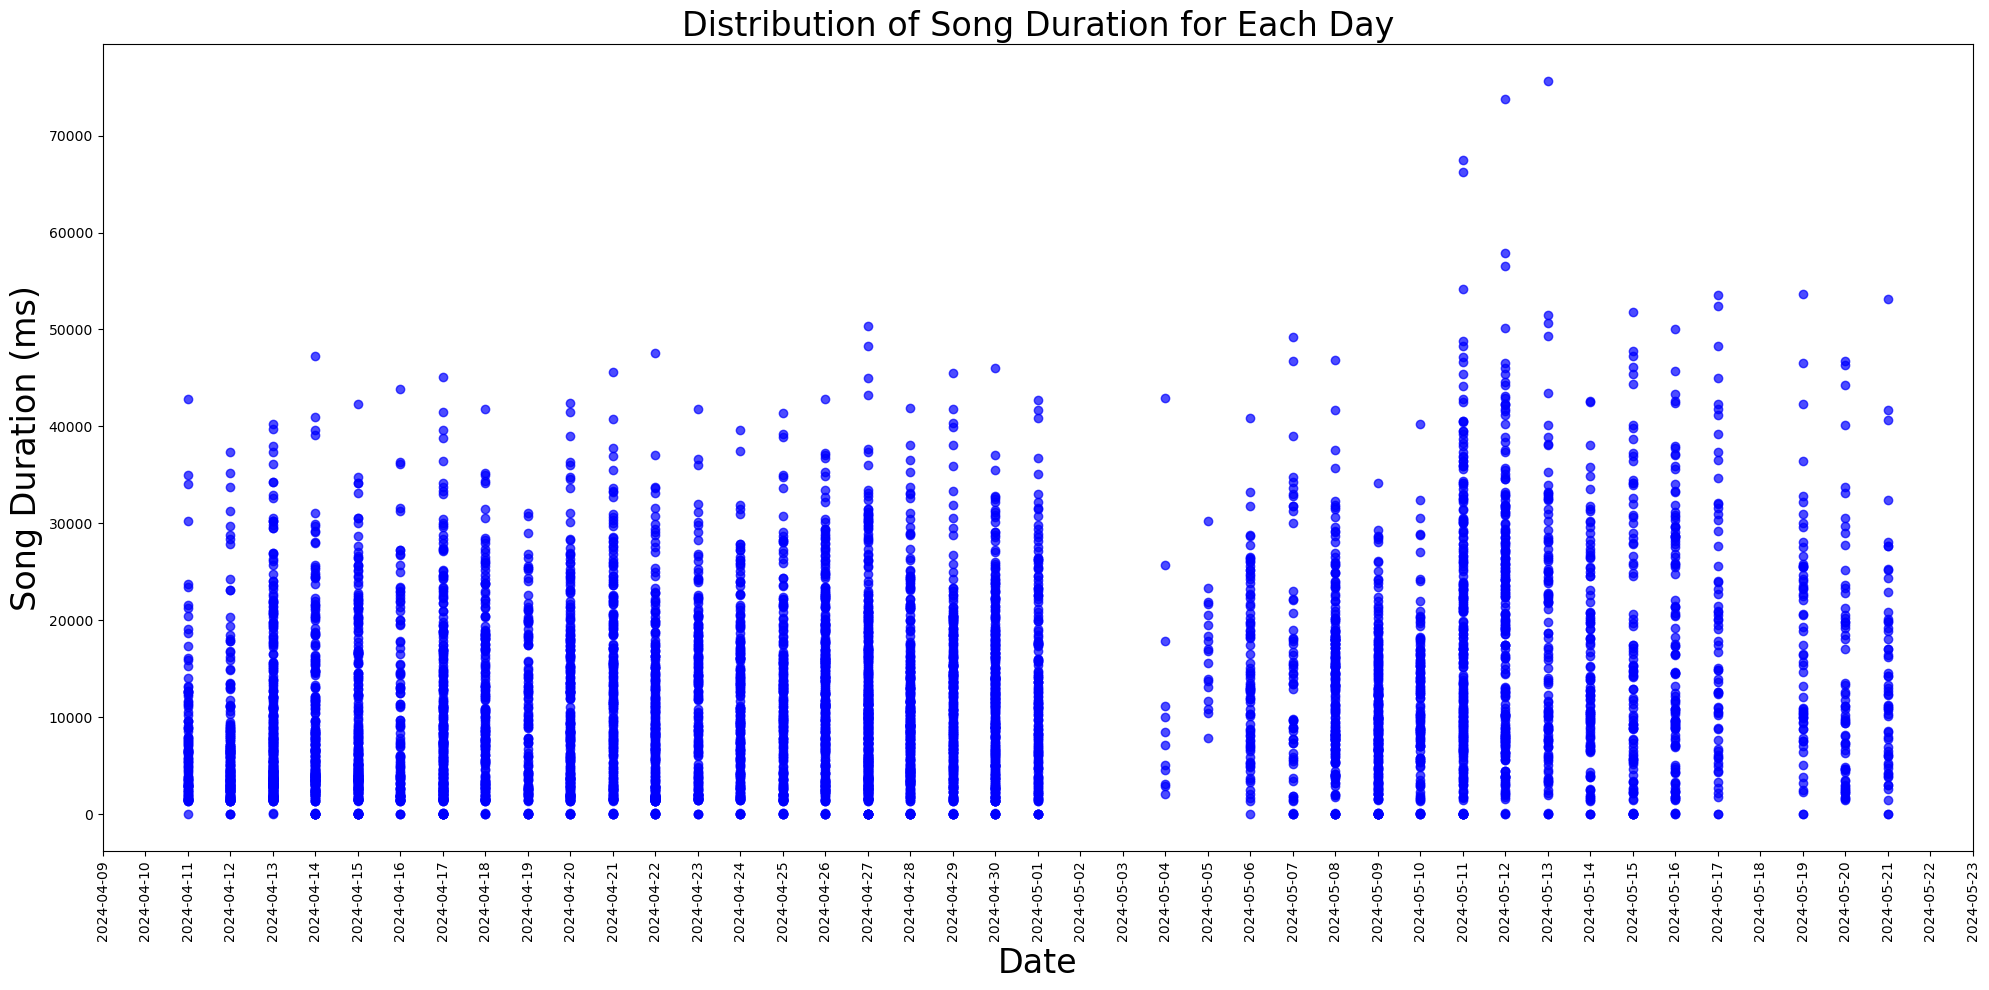

<Figure size 1000x600 with 0 Axes>

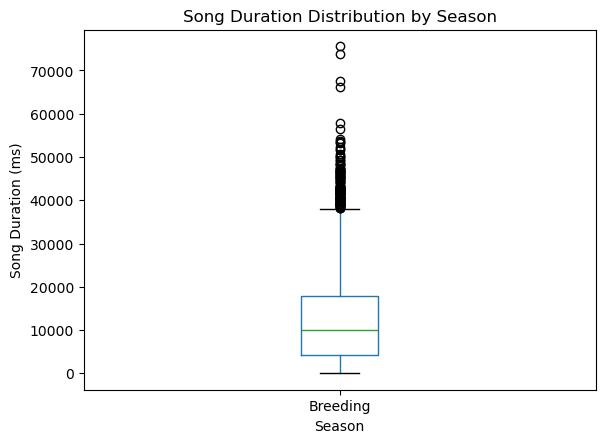

In [6]:
# Iterate over each row of the organized_data_frame
# Initialize a list to store song durations for each row
song_durations = []

# Loop through each row in the organized_data_frame
for index, row in organized_data_frame.iterrows():
    # Extract the syllable onsets/offsets dictionary for the current row
    syllable_onsets_offsets = row['syllable_onsets_offsets_ms_dict']
    
    # Initialize min and max values for each row
    min_onset = float('inf')
    max_offset = float('-inf')
    
    # Loop through each syllable's onset/offset list
    for times in syllable_onsets_offsets.values():
        for onset, offset in times:
            if onset < min_onset:
                min_onset = onset
            if offset > max_offset:
                max_offset = offset
    
    # Calculate the song duration and append it to the list
    song_duration = max_offset - min_onset
    song_durations.append(song_duration)

# Add the song_duration list as a new column in the organized_data_frame
organized_data_frame['song_duration'] = song_durations
# Use .head() to show the first few rows of the specified columns
print(organized_data_frame[['Date', 'syllable_onsets_offsets_ms_dict', 'song_duration']].head())



import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Find the minimum and maximum date of recording
min_date = organized_data_frame['Date'].min()
max_date = organized_data_frame['Date'].max()

# Generate a date range with a daily frequency from min_date to max_date
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Create scatter plot with all points in blue
plt.figure(figsize=(20, 10))

# Loop through each date in the range and check if there is data for that date
for current_date in all_dates:
    # Filter data for the current date
    daily_data = organized_data_frame[organized_data_frame['Date'] == current_date]
    
    # If there is data, plot the song_duration for that date in blue
    if not daily_data.empty:
        plt.scatter(daily_data['Date'], daily_data['song_duration'], color='blue', alpha=0.7)

# Configure plot with labels, title, and an x-tick for every day in the date range
plt.xlabel('Date', fontsize = 24)
plt.ylabel('Song Duration (ms)', fontsize = 24)
plt.title('Distribution of Song Duration for Each Day', fontsize  =24)
plt.xticks(ticks=all_dates, labels=[date.date() for date in all_dates], rotation=90)

# Ensure all dates are displayed
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Locator for each day on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-axis labels
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Assuming 'organized_data_frame' already exists and contains 'Date' and 'song_duration' columns

# Define the breeding and non-breeding months
breeding_months = [2, 3, 4, 5, 6]      # February to June
non_breeding_months = [10, 11, 12, 1]  # October to January

# Create a new column 'Season' based on the month of each date
organized_data_frame['Season'] = organized_data_frame['Date'].dt.month.apply(
    lambda x: 'Breeding' if x in breeding_months else ('Non-breeding' if x in non_breeding_months else 'Other')
)

# Filter the DataFrame to include only breeding and non-breeding seasons
filtered_data = organized_data_frame[organized_data_frame['Season'].isin(['Breeding', 'Non-breeding'])]

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='song_duration', by='Season', grid=False)
plt.title(f'Song Duration Distribution by Season')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Season')
plt.ylabel('Song Duration (ms)')
plt.show()

# Separate the song durations by season
breeding_durations = filtered_data[filtered_data['Season'] == 'Breeding']['song_duration']
non_breeding_durations = filtered_data[filtered_data['Season'] == 'Non-breeding']['song_duration']

# # Perform Mann-Whitney U test
# statistic, p_value = mannwhitneyu(breeding_durations, non_breeding_durations, alternative='two-sided')

# # Output the test results
# print("Mann-Whitney U Test Statistic:", statistic)
# print("P-Value:", p_value)



In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu

# # Assuming 'organized_data_frame' already exists and contains 'Date' and 'song_duration' columns

# # Define the breeding and non-breeding months
# breeding_months = [2, 3, 4, 5, 6]      # February to June
# non_breeding_months = [10, 11, 12, 1]  # October to January

# # Create a new column 'Season' based on the month of each date
# organized_data_frame['Season'] = organized_data_frame['Date'].dt.month.apply(
#     lambda x: 'Breeding' if x in breeding_months else ('Non-breeding' if x in non_breeding_months else 'Other')
# )

# # Filter the DataFrame to include only breeding and non-breeding seasons
# filtered_data = organized_data_frame[organized_data_frame['Season'].isin(['Breeding', 'Non-breeding'])]

# # Create a box and whisker plot
# plt.figure(figsize=(10, 6))
# filtered_data.boxplot(column='song_duration', by='Season', grid=False)
# plt.title(f'Song Duration Distribution by Season')
# plt.suptitle('')  # Suppress the automatic title
# plt.xlabel('Season')
# plt.ylabel('Song Duration (ms)')
# plt.show()

# # Separate the song durations by season
# breeding_durations = filtered_data[filtered_data['Season'] == 'Breeding']['song_duration']
# non_breeding_durations = filtered_data[filtered_data['Season'] == 'Non-breeding']['song_duration']

# # Perform Mann-Whitney U test
# statistic, p_value = mannwhitneyu(breeding_durations, non_breeding_durations, alternative='two-sided')

# # Output the test results
# print("Mann-Whitney U Test Statistic:", statistic)
# print("P-Value:", p_value)


# Make a heat map of how often syllables show up in songs across days

In [8]:
# syllable_label = '9'
# sample_song_index = 0
# syllable_onsets_offsets = organized_data_frame['syllable_onsets_offsets_ms_dict'][sample_song_index]
# sample_song = organized_data_frame['syllable_onsets_offsets_ms_dict'][sample_song_index]
# print(f"Sample song at index {sample_song_index}: {sample_song}")
# sample_syllable_occurrences = sample_song[syllable_label]
# print(f"In the sample song, syllable {syllable_label} occurs: {sample_syllable_occurrences}")
# num_times_of_phrase = len(sample_syllable_occurrences)
# print(f"Number of times syllable {syllable_label} is sung in song {sample_song_index}: {num_times_of_phrase}")

# #How long did the bird spend singing that syllable in the song?
# phrase_duration = sample_syllable_occurrences[0][1] - sample_syllable_occurrences[0][0]
# print(f"One phrase duration: {phrase_duration}")

In [9]:
# # Define the target syllable label and sample song index
# syllable_label = '9'
# sample_song_index = 0

# # Access the syllable onsets and offsets dictionary for the specified sample song
# syllable_onsets_offsets = organized_data_frame['syllable_onsets_offsets_ms_dict'][sample_song_index]
# sample_song = syllable_onsets_offsets

# # Print the sample song details
# print(f"Sample song at index {sample_song_index}: {sample_song}")

# # Get occurrences of the specified syllable label
# sample_syllable_occurrences = sample_song[syllable_label]
# print(f"In the sample song, syllable {syllable_label} occurs: {sample_syllable_occurrences}")

# # Count the number of occurrences of the specified syllable
# num_times_of_phrase = len(sample_syllable_occurrences)
# print(f"Number of times syllable {syllable_label} is sung in song {sample_song_index}: {num_times_of_phrase}")

# # Calculate the phrase duration for each occurrence
# phrase_durations = [
#     occurrence[1] - occurrence[0] for occurrence in sample_syllable_occurrences
# ]
# print(f"Phrase durations for each occurrence of syllable {syllable_label}: {phrase_durations}")


In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Define the target syllable label
# syllable_label = '9'

# # Find the minimum and maximum date of recording
# min_date = organized_data_frame['Date'].min()
# max_date = organized_data_frame['Date'].max()

# # Generate a date range with a daily frequency from min_date to max_date
# all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# # Initialize an empty list to store the syllable counts for each date
# syllable_counts_per_day = []

# # Loop through each date in the range to count syllable occurrences
# for current_date in all_dates:
#     # Filter data for the current date
#     daily_data = organized_data_frame[organized_data_frame['Date'] == current_date]
    
#     # Check if there is data for the current date
#     if not daily_data.empty:
#         # Count the occurrences of the syllable for each song on this date
#         daily_count = 0
#         for song in daily_data['syllable_onsets_offsets_ms_dict']:
#             # If the syllable label exists in the song data, count its occurrences
#             if syllable_label in song:
#                 daily_count += len(song[syllable_label])
#         syllable_counts_per_day.append(daily_count)
#     else:
#         syllable_counts_per_day.append(0)  # No occurrences if no data for this date

# # Create a scatter plot
# plt.figure(figsize=(20, 10))
# plt.scatter(all_dates, syllable_counts_per_day, color='blue', alpha=0.7)

# # Configure plot with labels, title, and x-tick for every day in the date range
# plt.xlabel('Date', fontsize=24)
# plt.ylabel(f'Count of Syllable {syllable_label} Occurrences', fontsize=24)
# plt.title(f'Daily Occurrences of Syllable {syllable_label}', fontsize=24)
# plt.xticks(rotation=90)

# # Ensure all dates are displayed
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.tight_layout()
# plt.show()


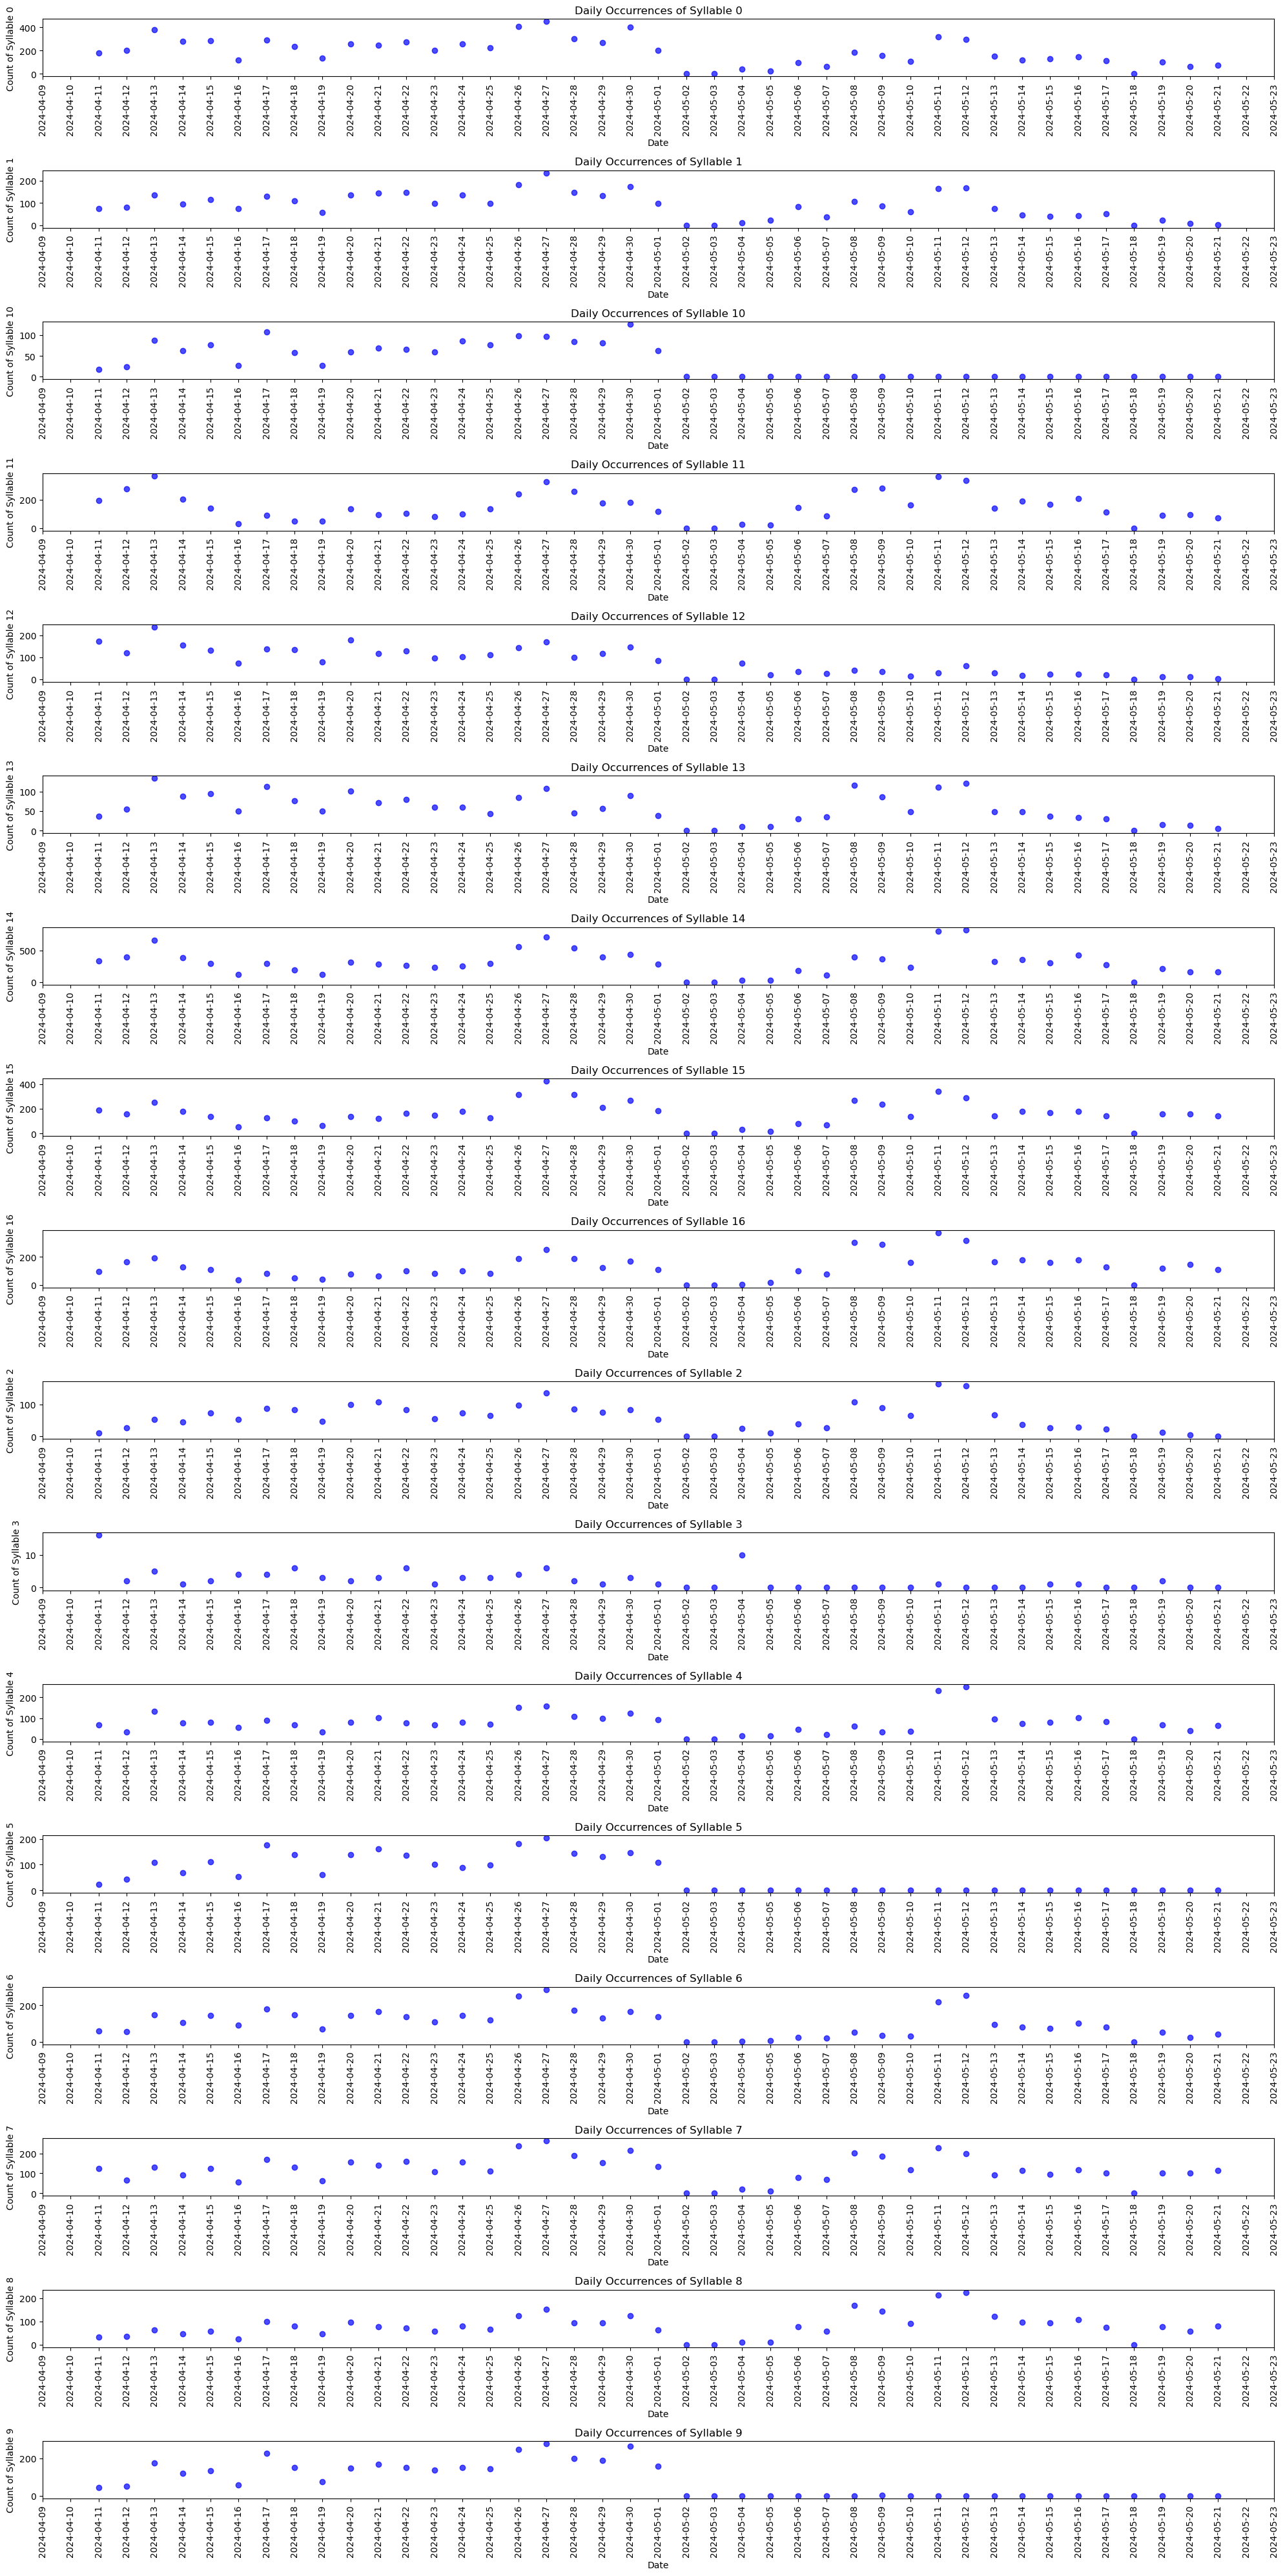

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Find the minimum and maximum date of recording
min_date = organized_data_frame['Date'].min()
max_date = organized_data_frame['Date'].max()

# Generate a date range with a daily frequency from min_date to max_date
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Set up the figure for subplots
plt.figure(figsize=(20, 40))
num_syllables = len(unique_syllable_labels)

# Loop through each unique syllable label
for i, syllable_label in enumerate(unique_syllable_labels, 1):
    # Initialize a list to store the syllable counts for each date
    syllable_counts_per_day = []
    
    # Loop through each date in the range to count syllable occurrences
    for current_date in all_dates:
        # Filter data for the current date
        daily_data = organized_data_frame[organized_data_frame['Date'] == current_date]
        
        # Check if there is data for the current date
        if not daily_data.empty:
            # Count the occurrences of the syllable for each song on this date
            daily_count = 0
            for song in daily_data['syllable_onsets_offsets_ms_dict']:
                # If the syllable label exists in the song data, count its occurrences
                if syllable_label in song:
                    daily_count += len(song[syllable_label])
            syllable_counts_per_day.append(daily_count)
        else:
            syllable_counts_per_day.append(0)  # No occurrences if no data for this date
    
    # Create a subplot for each syllable
    plt.subplot(num_syllables, 1, i)
    plt.scatter(all_dates, syllable_counts_per_day, color='blue', alpha=0.7)
    plt.title(f'Daily Occurrences of Syllable {syllable_label}')
    plt.xlabel('Date')
    plt.ylabel(f'Count of Syllable {syllable_label}')
    plt.xticks(rotation=90)
    
    # Format x-axis with dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Find the minimum and maximum date of recording
# min_date = organized_data_frame['Date'].min()
# max_date = organized_data_frame['Date'].max()

# # Generate a date range with a daily frequency from min_date to max_date
# all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# # Create a DataFrame to hold the syllable counts with syllable labels as rows and dates as columns
# heatmap_data = pd.DataFrame(0, index=unique_syllable_labels, columns=all_dates)

# # Fill the DataFrame with counts for each syllable label on each date
# for current_date in all_dates:
#     daily_data = organized_data_frame[organized_data_frame['Date'] == current_date]
    
#     if not daily_data.empty:
#         for syllable_label in unique_syllable_labels:
#             # Sum occurrences of the syllable label for all songs on this date
#             daily_count = sum(len(song.get(syllable_label, [])) for song in daily_data['syllable_onsets_offsets_ms_dict'])
#             heatmap_data.at[syllable_label, current_date] = daily_count

# # Plot the heatmap
# plt.figure(figsize=(20, 10))
# sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Syllable Count'})
# plt.title('Daily Occurrences of Each Syllable', fontsize=18)
# plt.xlabel('Date')
# plt.ylabel('Syllable Label')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()


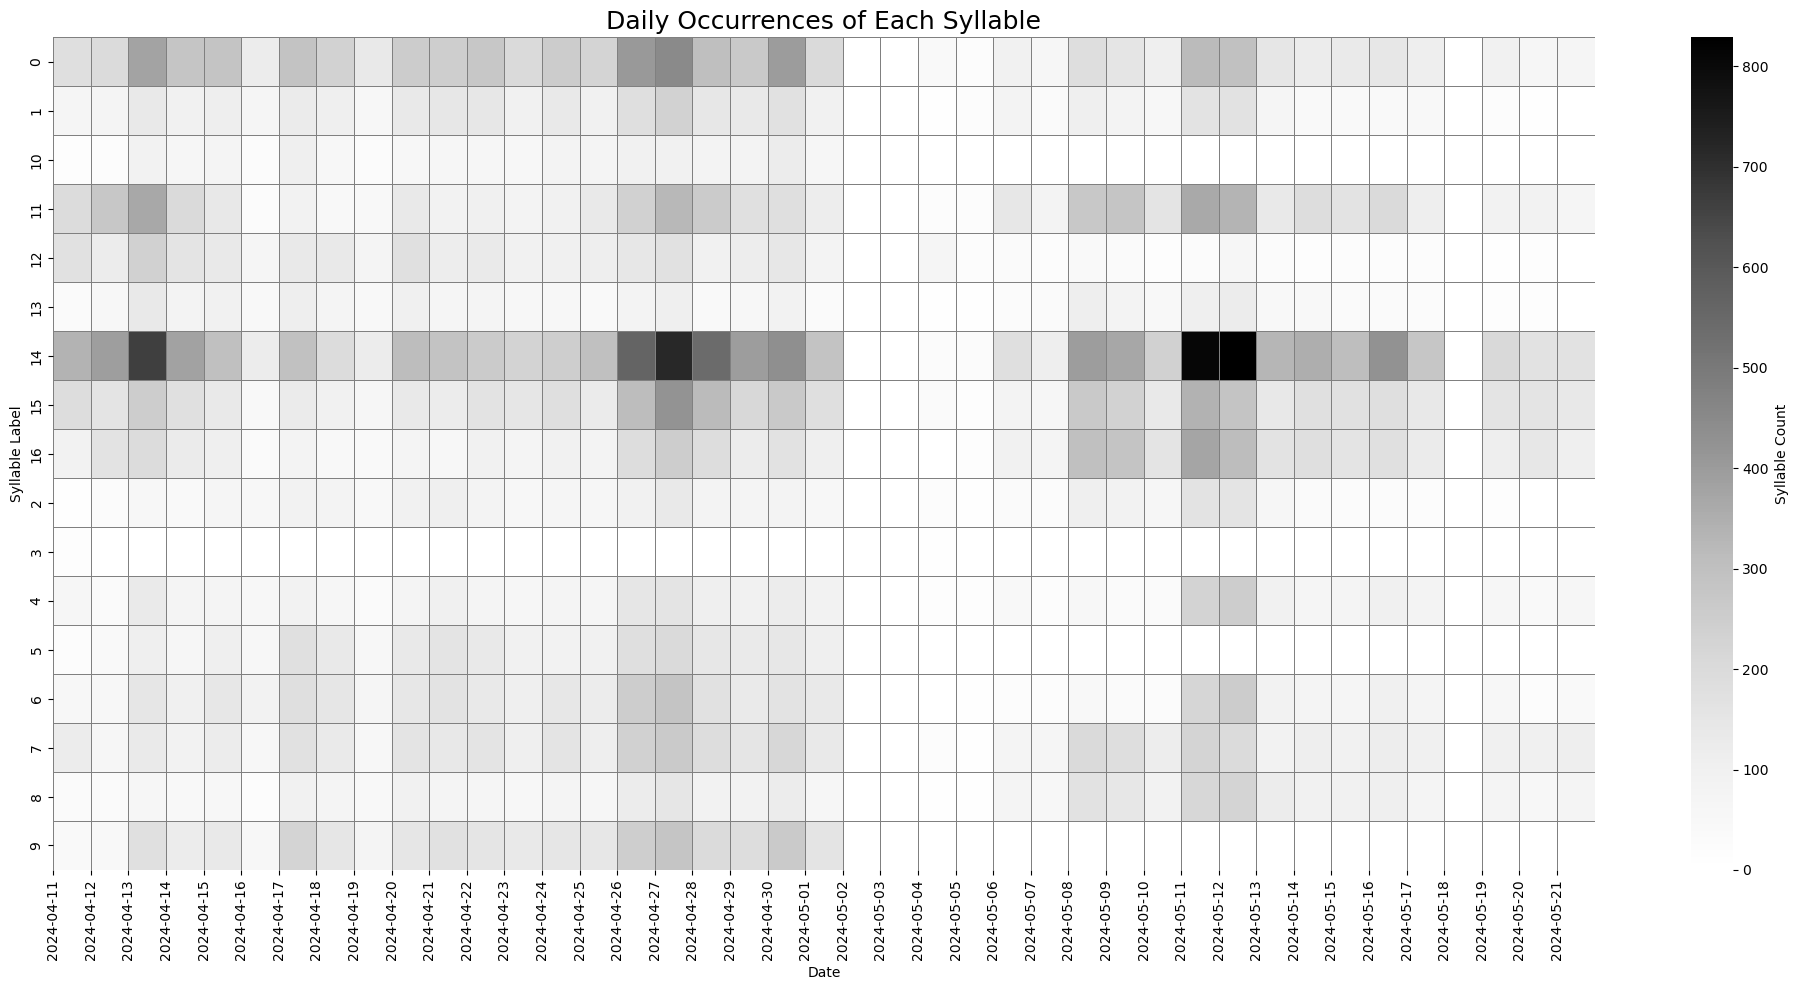

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Convert Unix timestamps in 'Date' column to datetime format if needed
organized_data_frame['Date'] = pd.to_datetime(organized_data_frame['Date'], unit='s')  # Assumes Unix timestamps in seconds

# Find the minimum and maximum date of recording
min_date = organized_data_frame['Date'].min()
max_date = organized_data_frame['Date'].max()

# Generate a date range with a daily frequency from min_date to max_date
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Create a DataFrame to hold the syllable counts with syllable labels as rows and dates as columns
heatmap_data = pd.DataFrame(0, index=unique_syllable_labels, columns=all_dates)

# Fill the DataFrame with counts for each syllable label on each date
for current_date in all_dates:
    daily_data = organized_data_frame[organized_data_frame['Date'] == current_date]
    
    if not daily_data.empty:
        for syllable_label in unique_syllable_labels:
            # Sum occurrences of the syllable label for all songs on this date
            daily_count = sum(len(song.get(syllable_label, [])) for song in daily_data['syllable_onsets_offsets_ms_dict'])
            heatmap_data.at[syllable_label, current_date] = daily_count

# Plot the heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(heatmap_data, cmap = "Greys", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Syllable Count'})
plt.title('Daily Occurrences of Each Syllable', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Syllable Label')

# Set x-ticks and convert them to strings for proper labeling
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns.strftime('%Y-%m-%d'), rotation=90)

plt.tight_layout()
plt.show()


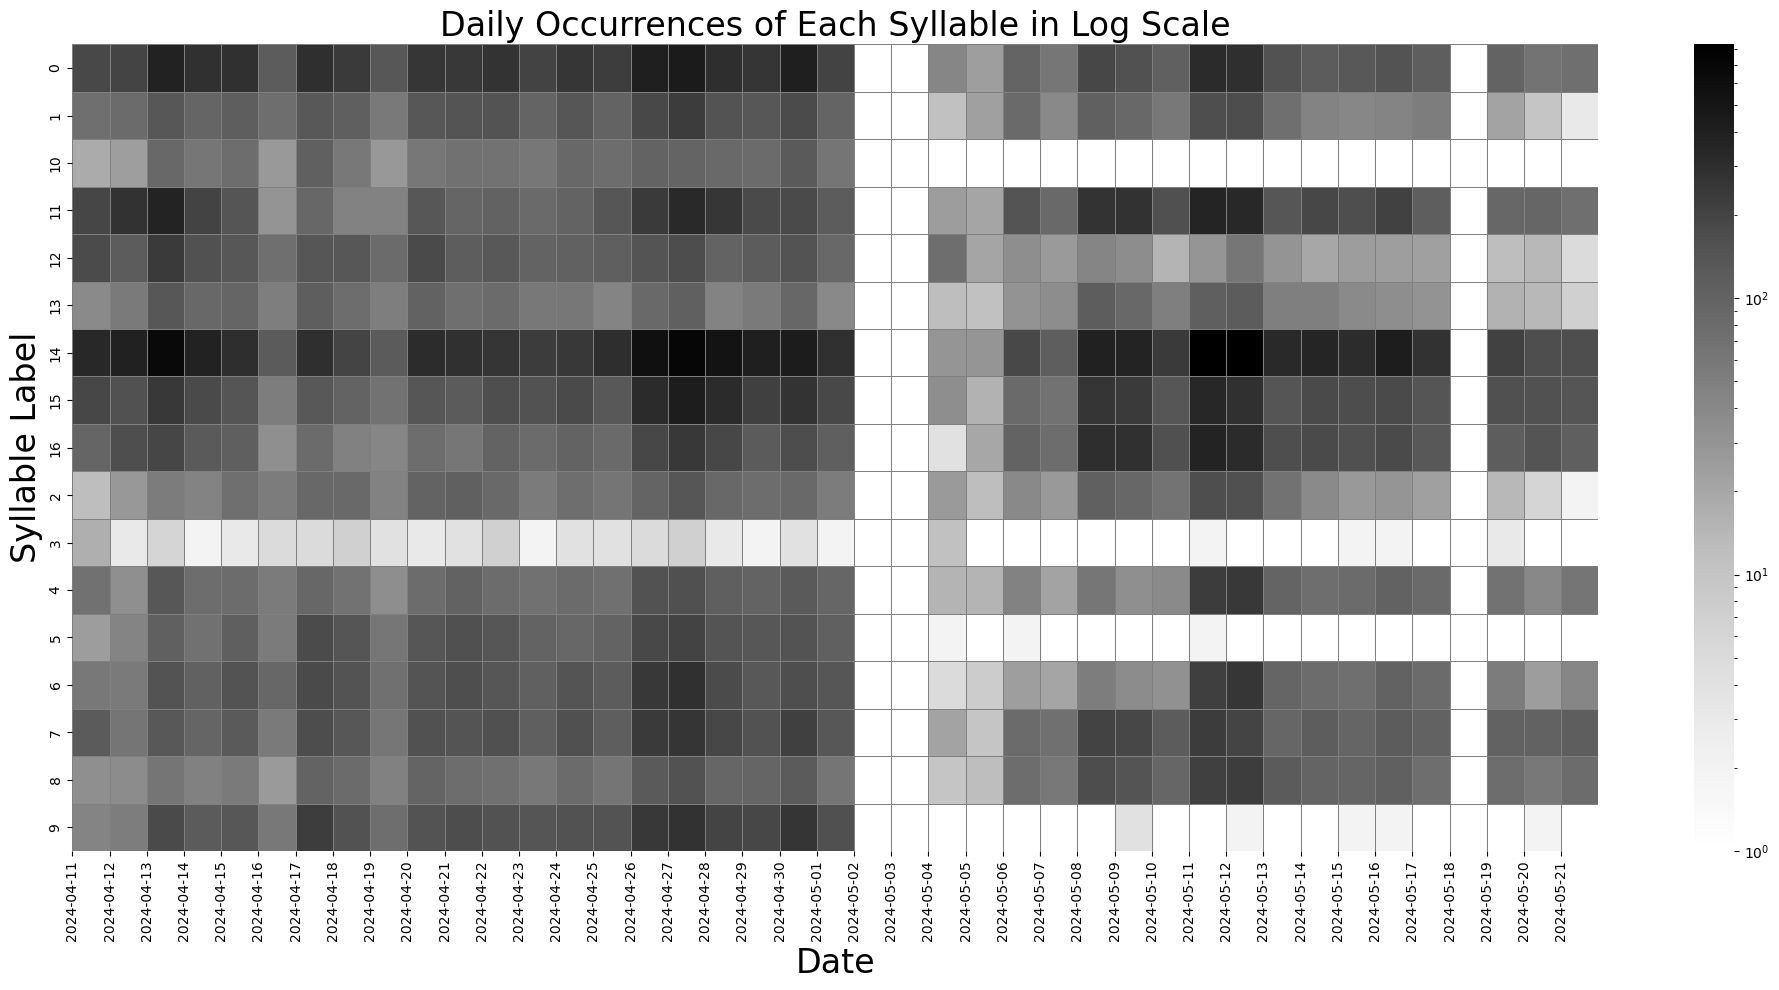

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
import numpy as np

# Convert Unix timestamps in 'Date' column to datetime format if needed
organized_data_frame['Date'] = pd.to_datetime(organized_data_frame['Date'], unit='s')  # Assumes Unix timestamps in seconds

# Find the minimum and maximum date of recording
min_date = organized_data_frame['Date'].min()
max_date = organized_data_frame['Date'].max()

# Generate a date range with a daily frequency from min_date to max_date
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Create a DataFrame to hold the syllable counts with syllable labels as rows and dates as columns
heatmap_data = pd.DataFrame(0, index=unique_syllable_labels, columns=all_dates)

# Fill the DataFrame with counts for each syllable label on each date
for current_date in all_dates:
    daily_data = organized_data_frame[organized_data_frame['Date'] == current_date]
    
    if not daily_data.empty:
        for syllable_label in unique_syllable_labels:
            # Sum occurrences of the syllable label for all songs on this date
            daily_count = sum(len(song.get(syllable_label, [])) for song in daily_data['syllable_onsets_offsets_ms_dict'])
            heatmap_data.at[syllable_label, current_date] = daily_count

# Uncomment one of the following three options to apply different scaling methods:

# Option 1: Logarithmic scale (adds +1 to avoid log(0) issues)
# plt.figure(figsize=(20, 10))
# ax = sns.heatmap(heatmap_data + 1, cmap="Greys", norm=LogNorm(), linewidths=0.5, linecolor='gray', 
#                  cbar_kws={'label': 'Syllable Count (Log Scale)'})
# plt.title('Daily Occurrences of Each Syllable in Log Scale', fontsize=24)

plt.figure(figsize=(20, 10))
ax = sns.heatmap(heatmap_data + 1, cmap="Greys", norm=LogNorm(), linewidths=0.5, linecolor='gray')
plt.title('Daily Occurrences of Each Syllable in Log Scale', fontsize=24)

# Option 2: Clipping outliers to a maximum value (e.g., 1000)
# plt.figure(figsize=(20, 10))
# ax = sns.heatmap(heatmap_data.clip(upper=1000), cmap="Greys", linewidths=0.5, linecolor='gray', 
#                  cbar_kws={'label': 'Syllable Count (Clipped to 1000)'})
# plt.title('Daily Occurrences of Each Syllable - Clipped to 1000', fontsize=18)

# Option 3: Square root transformation
# plt.figure(figsize=(20, 10))
# ax = sns.heatmap(np.sqrt(heatmap_data), cmap="Greys", linewidths=0.5, linecolor='gray', 
#                  cbar_kws={'label': 'Syllable Count (Square Root Transformed)'})
# plt.title('Daily Occurrences of Each Syllable - Square Root Transformed', fontsize=18)

# Set x-ticks and convert them to strings for proper labeling
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns.strftime('%Y-%m-%d'), rotation=90)

plt.xlabel('Date', fontsize = 24)
plt.ylabel('Syllable Label', fontsize = 24)
plt.tight_layout()
plt.show()


## Make a heat map of how much time (ms) the bird spend singing the each syllable each day

In [ ]:
# # Define the target syllable label and sample song index
# syllable_label = '9'
# sample_song_index = 0

# # Access the syllable onsets and offsets dictionary for the specified sample song
# syllable_onsets_offsets = organized_data_frame['syllable_onsets_offsets_ms_dict'][sample_song_index]
# sample_song = syllable_onsets_offsets

# # Print the sample song details
# print(f"Sample song at index {sample_song_index}: {sample_song}")

# # Get occurrences of the specified syllable label
# sample_syllable_occurrences = sample_song[syllable_label]
# print(f"In the sample song, syllable {syllable_label} occurs: {sample_syllable_occurrences}")

# # Count the number of occurrences of the specified syllable
# num_times_of_phrase = len(sample_syllable_occurrences)
# print(f"Number of times syllable {syllable_label} is sung in song {sample_song_index}: {num_times_of_phrase}")

# # Calculate the phrase duration for each occurrence
# phrase_durations = [
#     occurrence[1] - occurrence[0] for occurrence in sample_syllable_occurrences
# ]
# print(f"Phrase durations for each occurrence of syllable {syllable_label}: {phrase_durations}")


Sample song at index 0: {'15': [[0.0, 26.984126984126988]], '12': [[26.984126984126988, 1886.1904761904764]], '0': [[1886.1904761904764, 2234.285714285714]]}


KeyError: '9'

In [17]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Define the target syllable label
# syllable_label = '9'

# # Find the minimum and maximum date of recording
# min_date = organized_data_frame['Date'].min()
# max_date = organized_data_frame['Date'].max()

# # Generate a date range with a daily frequency from min_date to max_date
# all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# # Initialize an empty list to store the total singing time for each day
# syllable_time_per_day = []

# # Loop through each date in the range to sum the singing time of the target syllable
# for current_date in all_dates:
#     # Filter data for the current date
#     daily_data = organized_data_frame[organized_data_frame['Date'] == current_date]
    
#     # Check if there is data for the current date
#     if not daily_data.empty:
#         # Total singing time for the syllable on this date
#         daily_total_time = 0
#         for song in daily_data['syllable_onsets_offsets_ms_dict']:
#             # If the syllable label exists in the song data, calculate its total singing time
#             if syllable_label in song:
#                 phrase_durations = [
#                     occurrence[1] - occurrence[0] for occurrence in song[syllable_label]
#                 ]
#                 daily_total_time += sum(phrase_durations)
#         syllable_time_per_day.append(daily_total_time)
#     else:
#         syllable_time_per_day.append(0)  # No singing time if no data for this date

# # Create a scatter plot for total singing time per day
# plt.figure(figsize=(20, 10))
# plt.scatter(all_dates, syllable_time_per_day, color='blue', alpha=0.7)

# # Configure plot with labels, title, and x-tick for every day in the date range
# plt.xlabel('Date', fontsize=24)
# plt.ylabel(f'Total Time Singing Syllable {syllable_label} (ms)', fontsize=24)
# plt.title(f'Daily Total Time Singing Syllable {syllable_label}', fontsize=24)
# plt.xticks(rotation=90)

# # Ensure all dates are displayed
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.tight_layout()
# plt.show()


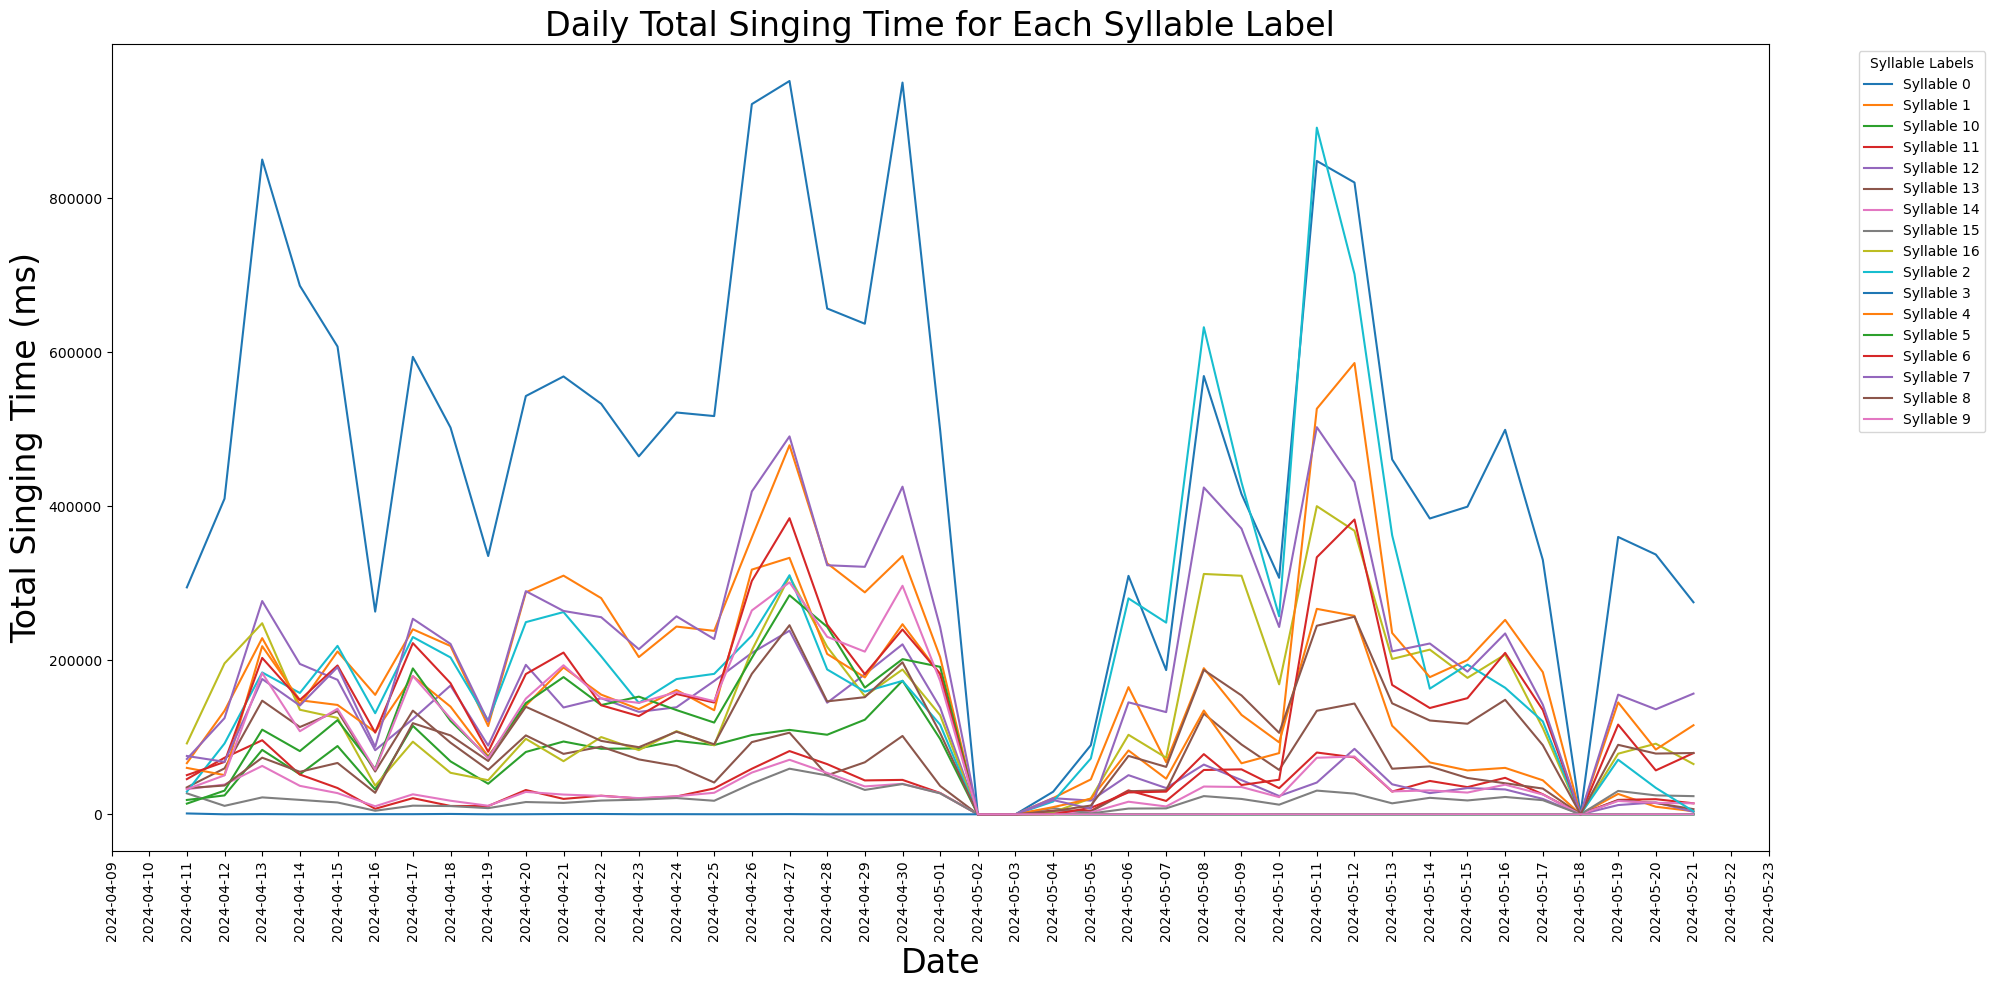

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the list of unique syllable labels
# unique_syllable_labels = ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', 
#                           '18', '19', '2', '20', '21', '22', '3', '4', '5', '6', 
#                           '7', '8', '9']

# Find the minimum and maximum date of recording
min_date = organized_data_frame['Date'].min()
max_date = organized_data_frame['Date'].max()

# Generate a date range with a daily frequency from min_date to max_date
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Dictionary to store syllable time per day for each unique syllable label
syllable_time_per_day = {syllable_label: [] for syllable_label in unique_syllable_labels}

# Loop through each unique syllable label
for syllable_label in unique_syllable_labels:
    # Loop through each date in the range to sum the singing time of the target syllable
    for current_date in all_dates:
        # Filter data for the current date
        daily_data = organized_data_frame[organized_data_frame['Date'] == current_date]
        
        # Check if there is data for the current date
        if not daily_data.empty:
            # Total singing time for the syllable on this date
            daily_total_time = 0
            for song in daily_data['syllable_onsets_offsets_ms_dict']:
                # If the syllable label exists in the song data, calculate its total singing time
                if syllable_label in song:
                    phrase_durations = [
                        occurrence[1] - occurrence[0] for occurrence in song[syllable_label]
                    ]
                    daily_total_time += sum(phrase_durations)
            syllable_time_per_day[syllable_label].append(daily_total_time)
        else:
            syllable_time_per_day[syllable_label].append(0)  # No singing time if no data for this date

# Plot total singing time per day for each syllable label
plt.figure(figsize=(20, 10))
for syllable_label, daily_times in syllable_time_per_day.items():
    plt.plot(all_dates, daily_times, label=f'Syllable {syllable_label}')

# Configure plot with labels, title, and x-tick for every day in the date range
plt.xlabel('Date', fontsize=24)
plt.ylabel('Total Singing Time (ms)', fontsize=24)
plt.title('Daily Total Singing Time for Each Syllable Label', fontsize=24)
plt.xticks(rotation=90)
plt.legend(title='Syllable Labels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure all dates are displayed
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()


/var/folders/f4/1h7zvz4d1fxc5m8g17h70mfm0000gn/T/ipykernel_2567/1137115545.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '294596.50793650793' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.at[syllable_label, current_date] = daily_total_time
/var/folders/f4/1h7zvz4d1fxc5m8g17h70mfm0000gn/T/ipykernel_2567/1137115545.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '409767.46031746035' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.at[syllable_label, current_date] = daily_total_time
/var/folders/f4/1h7zvz4d1fxc5m8g17h70mfm0000gn/T/ipykernel_2567/1137115545.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '850040.4761904766' 

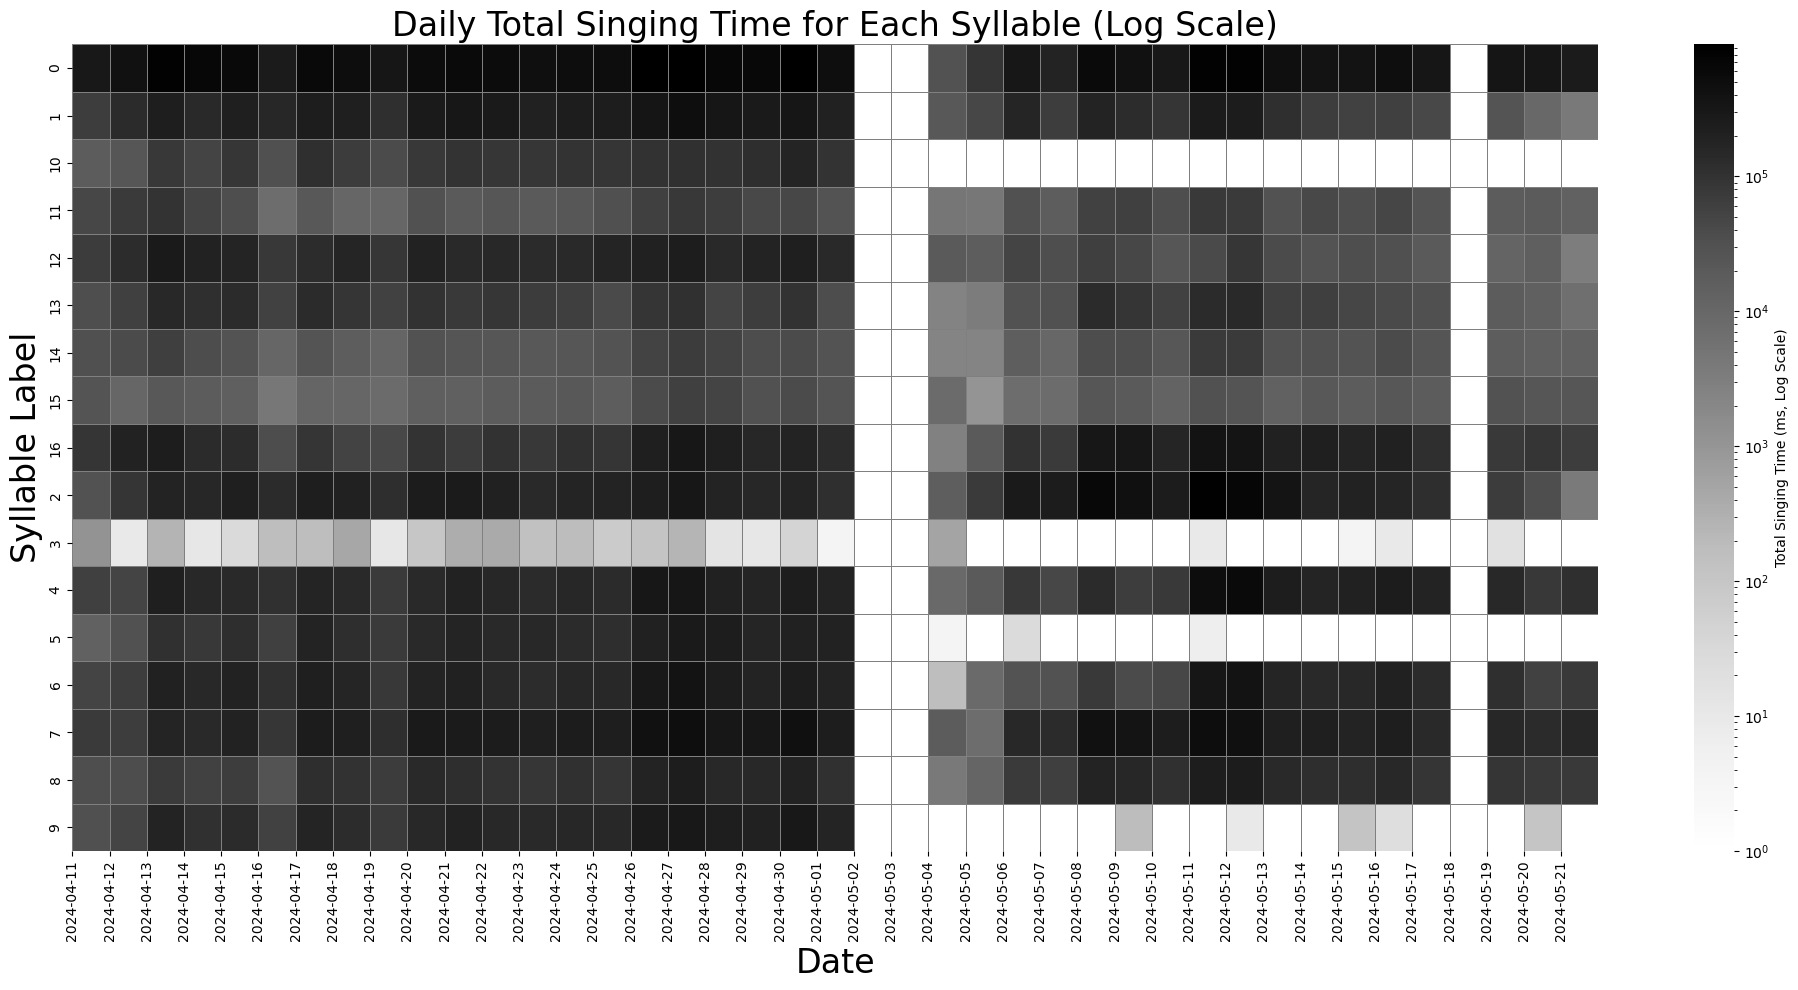

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
import numpy as np

# Convert Unix timestamps in 'Date' column to datetime format if needed
organized_data_frame['Date'] = pd.to_datetime(organized_data_frame['Date'], unit='s')  # Assumes Unix timestamps in seconds

# Define unique syllable labels
# unique_syllable_labels = ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', 
#                           '18', '19', '2', '20', '21', '22', '3', '4', '5', '6', 
#                           '7', '8', '9']

# Find the minimum and maximum date of recording
min_date = organized_data_frame['Date'].min()
max_date = organized_data_frame['Date'].max()

# Generate a date range with a daily frequency from min_date to max_date
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Create a DataFrame to hold the total time spent singing each syllable (ms) with syllable labels as rows and dates as columns
heatmap_data = pd.DataFrame(0, index=unique_syllable_labels, columns=all_dates)

# Fill the DataFrame with total singing time for each syllable label on each date
for current_date in all_dates:
    daily_data = organized_data_frame[organized_data_frame['Date'] == current_date]
    
    if not daily_data.empty:
        for syllable_label in unique_syllable_labels:
            # Sum total time for the syllable label across all songs on this date
            daily_total_time = 0
            for song in daily_data['syllable_onsets_offsets_ms_dict']:
                if syllable_label in song:
                    phrase_durations = [occurrence[1] - occurrence[0] for occurrence in song[syllable_label]]
                    daily_total_time += sum(phrase_durations)
            heatmap_data.at[syllable_label, current_date] = daily_total_time

# Plot heatmap with log scale
plt.figure(figsize=(20, 10))
ax = sns.heatmap(heatmap_data + 1, cmap="Greys", norm=LogNorm(), linewidths=0.5, linecolor='gray',
                 cbar_kws={'label': 'Total Singing Time (ms, Log Scale)'})
plt.title('Daily Total Singing Time for Each Syllable (Log Scale)', fontsize=24)

# Configure x-ticks for each date and format them
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns.strftime('%Y-%m-%d'), rotation=90)

plt.xlabel('Date', fontsize=24)
plt.ylabel('Syllable Label', fontsize=24)
plt.tight_layout()
plt.show()


/var/folders/f4/1h7zvz4d1fxc5m8g17h70mfm0000gn/T/ipykernel_2567/325671797.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '294.5965079365079' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.at[syllable_label, current_date] = daily_total_time
/var/folders/f4/1h7zvz4d1fxc5m8g17h70mfm0000gn/T/ipykernel_2567/325671797.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '409.76746031746023' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.at[syllable_label, current_date] = daily_total_time
/var/folders/f4/1h7zvz4d1fxc5m8g17h70mfm0000gn/T/ipykernel_2567/325671797.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '850.0404761904763' has 

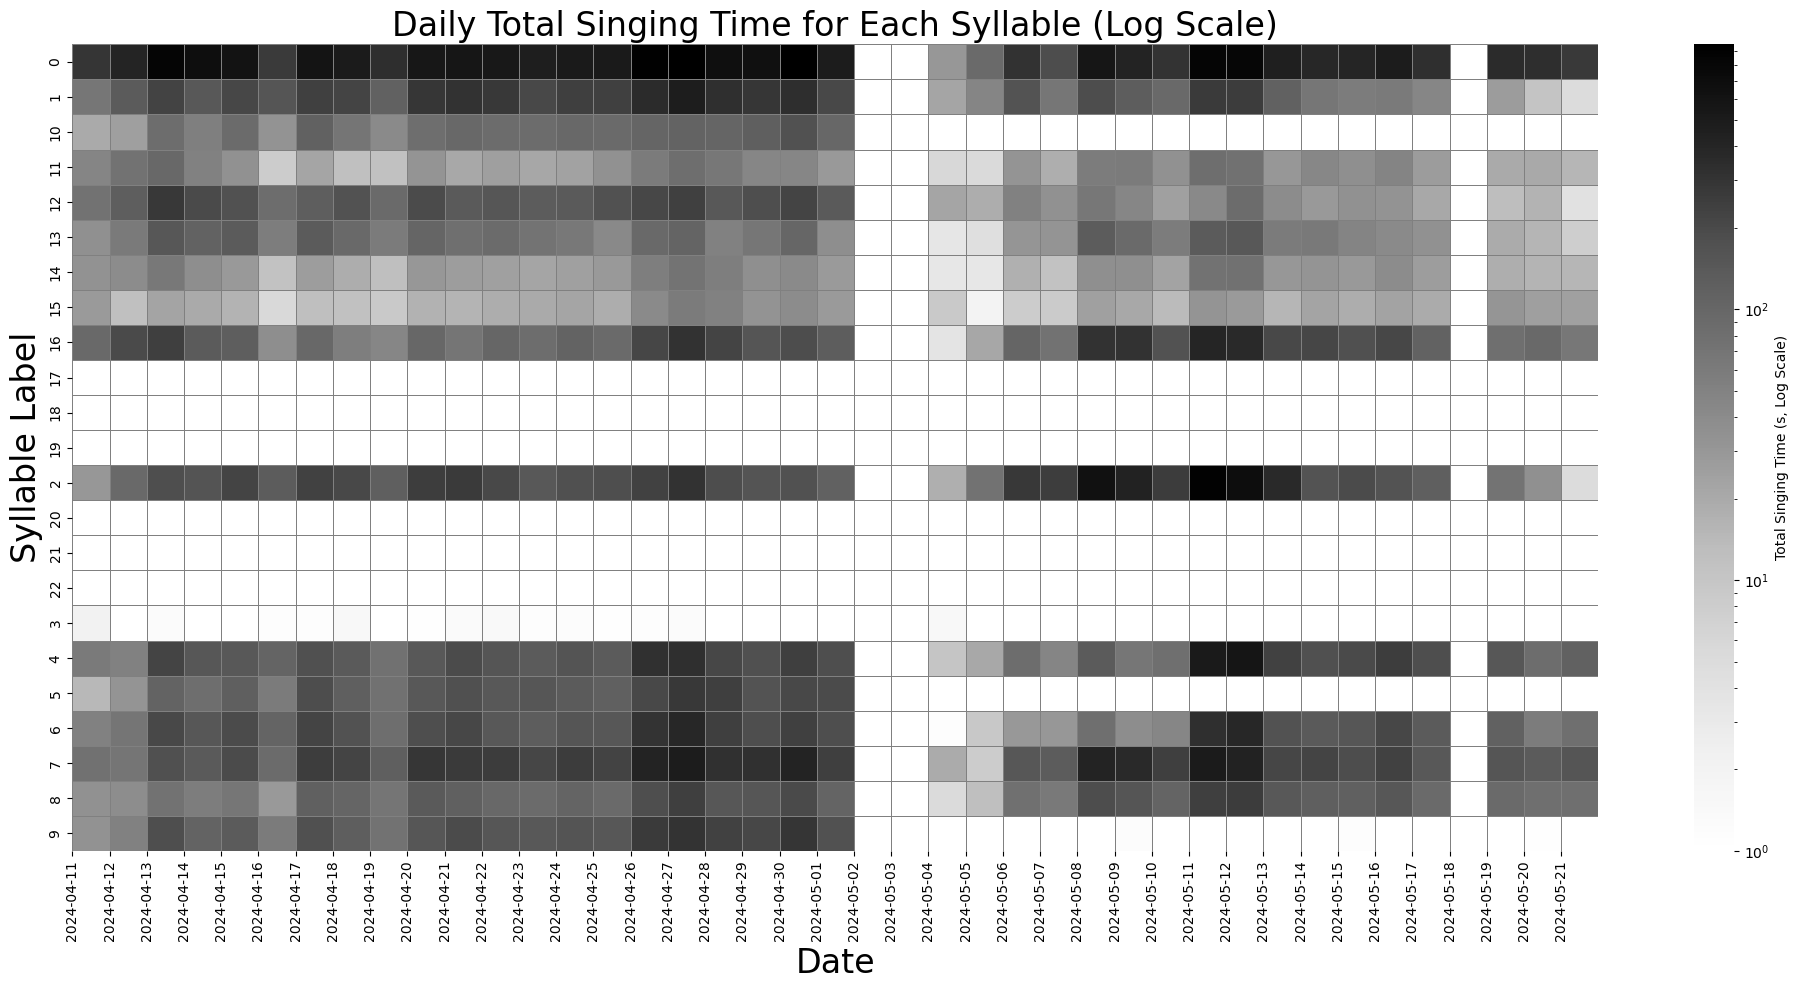

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# Convert Unix timestamps in 'Date' column to datetime format if needed
organized_data_frame['Date'] = pd.to_datetime(organized_data_frame['Date'], unit='s')  # Assumes Unix timestamps in seconds

# Define unique syllable labels
unique_syllable_labels = ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', 
                          '18', '19', '2', '20', '21', '22', '3', '4', '5', '6', 
                          '7', '8', '9']

# Find the minimum and maximum date of recording
min_date = organized_data_frame['Date'].min()
max_date = organized_data_frame['Date'].max()

# Generate a date range with a daily frequency from min_date to max_date
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Create a DataFrame to hold the total time spent singing each syllable (in seconds) with syllable labels as rows and dates as columns
heatmap_data = pd.DataFrame(0, index=unique_syllable_labels, columns=all_dates)

# Fill the DataFrame with total singing time in seconds for each syllable label on each date
for current_date in all_dates:
    daily_data = organized_data_frame[organized_data_frame['Date'] == current_date]
    
    if not daily_data.empty:
        for syllable_label in unique_syllable_labels:
            # Sum total time for the syllable label across all songs on this date, converting to seconds
            daily_total_time = 0
            for song in daily_data['syllable_onsets_offsets_ms_dict']:
                if syllable_label in song:
                    phrase_durations = [(occurrence[1] - occurrence[0]) / 1000 for occurrence in song[syllable_label]]
                    daily_total_time += sum(phrase_durations)
            heatmap_data.at[syllable_label, current_date] = daily_total_time

# Plot heatmap with log scale
plt.figure(figsize=(20, 10))
ax = sns.heatmap(heatmap_data + 1, cmap="Greys", norm=LogNorm(), linewidths=0.5, linecolor='gray',
                 cbar_kws={'label': 'Total Singing Time (s, Log Scale)'})
plt.title('Daily Total Singing Time for Each Syllable (Log Scale)', fontsize=24)

# Configure x-ticks for each date and format them
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns.strftime('%Y-%m-%d'), rotation=90)

plt.xlabel('Date', fontsize=24)
plt.ylabel('Syllable Label', fontsize=24)
plt.tight_layout()
plt.show()
